### Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##  Get the Data
### data source:- https://www.kaggle.com/datasets/srolka/ecommerce-customers

In [2]:
customers = pd.read_csv('Ecommerce Customers.csv')

### Check the data head(first 5 row)

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Data shape , describe() and info() method

In [4]:
customers.shape    # shape of data no of rows and column

(500, 8)

In [5]:
customers.describe()   

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### Check Null Values in data

In [7]:
customers.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

## Exploratory Data Analysis

### create a jointplot to compare the Time on Website and Yearly Amount Spent columns

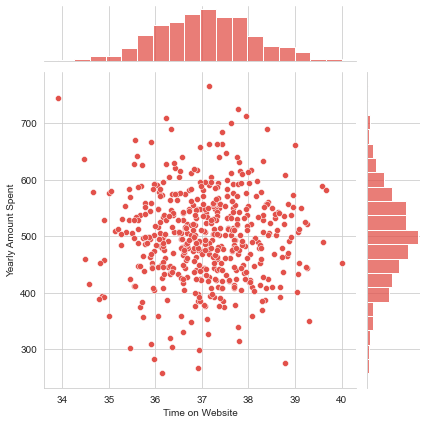

In [8]:
sns.set_palette('Spectral')
sns.set_style('whitegrid')
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

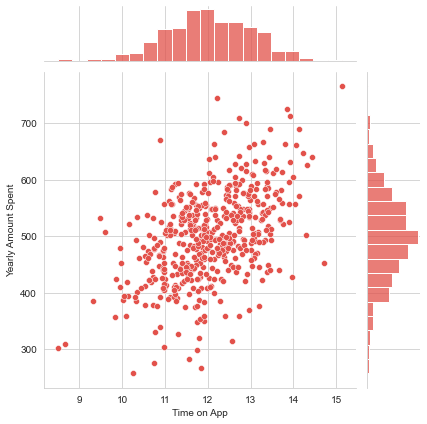

In [9]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

### Check corelation with heatmap

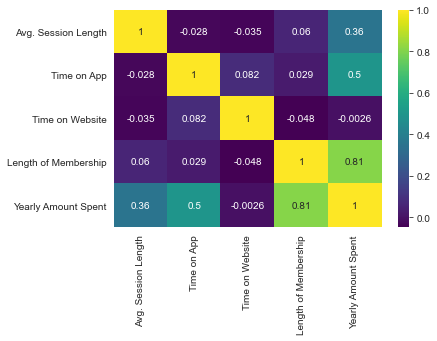

In [10]:
sns.heatmap(customers.corr(), annot = True , cmap = 'viridis')
plt.savefig("Ecommerce_Customers_Corelation.png", format='png',dpi = 800,bbox_inches='tight')

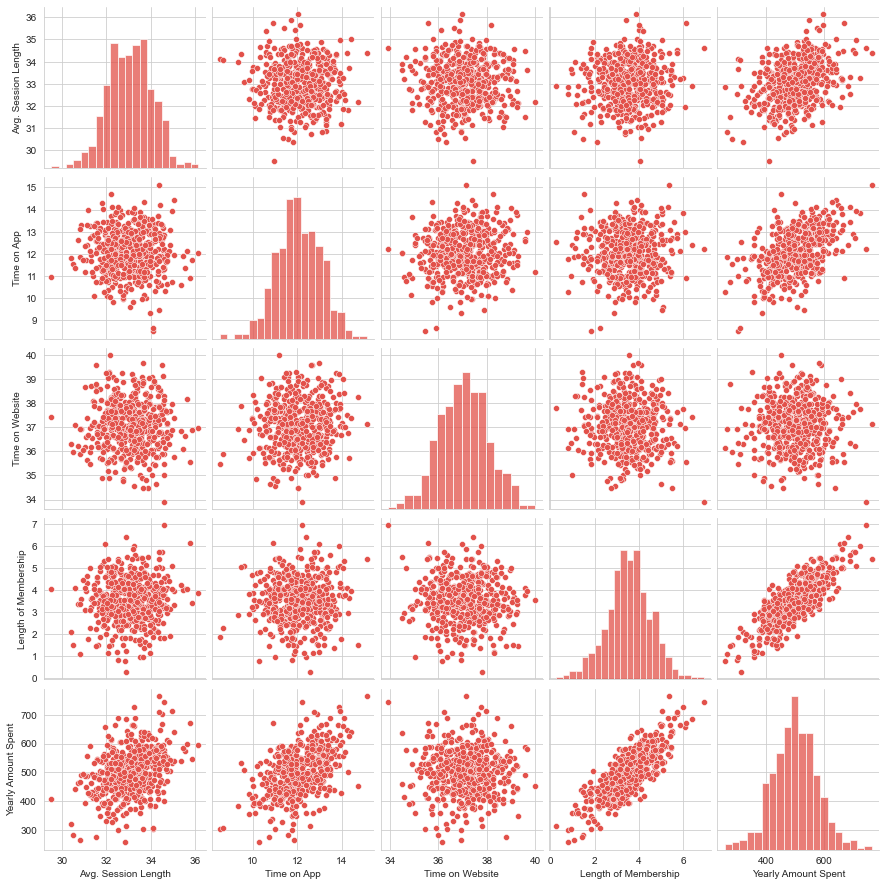

In [11]:
sns.pairplot(customers)

### Based off this plot , Length of Membership with Yearly Amount Spent most corelated 
#### Create a linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs. Length of Membership

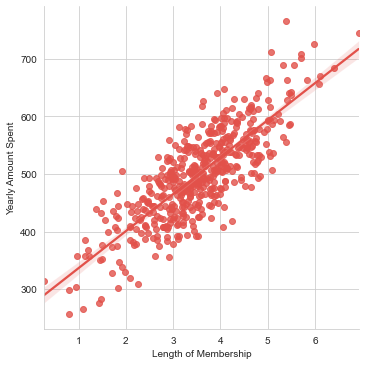

In [12]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## Training and testing data
### Spliting data into training and testing set
#### Drop unnecessary column

In [13]:
X = customers.drop(columns=['Email','Address','Avatar','Yearly Amount Spent'])

In [14]:
y = customers['Yearly Amount Spent']

#### check shape of data

In [15]:
print(X.shape)
print(y.shape)

(500, 4)
(500,)


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=201)

## Training the Model

### Import linear regression

In [18]:
from sklearn.linear_model import LinearRegression

#### Create an instance of a LinearRegression() model named lr

In [19]:
lr = LinearRegression()

#### fit model on the training data.

In [20]:
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
# The coefficients
print('Coefficients: \n', lr.coef_)

Coefficients: 
 [25.6974762  38.76312911  0.21456506 61.60200412]


## Predicting Test Data

In [22]:
predictions = lr.predict( X_test)

#### Create a scatterplot of the real test values Vs the predicted values. 

Text(0, 0.5, 'Predicted Y')

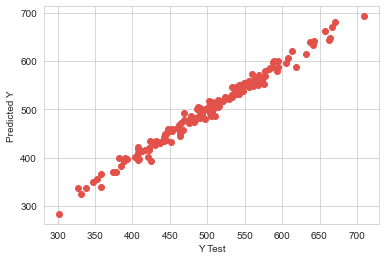

In [23]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error

In [24]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.777557458484168
MSE: 97.61288638137691
RMSE: 9.879923399570307
